In [2]:
import glob, os
import matplotlib.pyplot as plt
plt.ion()

In [3]:
file_dir = ('/lab_data/coaxlab/Projects/loki_1/stat_maps/derivatives/trialwise_response/sub-{}/ses-{}/func/')
file_pattern = ('*sub-{}*ses-{}*run-{}*.nii.gz')

In [4]:
subjects = [790, 811, 813, 860]; sessions = range(2,11); runs = range(0,5); n_trials_per_run = 60

# Checking beta maps 

In [4]:
def check_n_stat_maps(stat_type, subject=subjects, 
                    sessions=sessions, runs=runs,
                   n_trials_per_run=n_trials_per_run, 
                   file_dir=file_dir,
                   file_pattern=file_pattern):
  
    stat_types = ['z_maps', 'eff_maps', 'FDR_maps']
    
    if stat_type not in stat_types:
        raise ValueError("Invalid stat. type. Expected one of: {}".format(stat_types))
 
    stat_path = os.path.join(file_dir, stat_type, file_pattern)
        
    all_sorted_files = []

    for s in subjects:
        for sess in sessions:
            for run in runs:

                sess = str(sess)
                run = str(run).zfill(2)

                if len(sess) == 1:
                    sess = str(sess).zfill(2)

                files = glob.glob(stat_path.format(s, sess, s, sess, run))
                sorted_files = sorted(files, key=lambda x:int(x.split('trial-')[1].split('.nii.gz')[0]))

                print(s, sess, run, len(sorted_files))

                try:
                    assert len(sorted_files) == n_trials_per_run, 'check number of stat maps for subject {} session {} run {}'.format(s, sess, run)
                except AssertionError as e:
                    print(e)
                    continue

                all_sorted_files.append(sorted_files)
                
    return all_sorted_files

In [ ]:
all_sorted_eff_files = check_n_stat_maps(stat_type='eff_maps')

In [ ]:
all_sorted_z_files = check_n_stat_maps(stat_type='z_maps')

In [ ]:
all_sorted_FDR_files = check_n_stat_maps(stat_type='FDR_maps')

# Checking a sample of the design matrices

In [5]:
import random 

In [6]:
design_matrix_path = ('/user_data/kbond/trialwise_response/output/design_matrices/*.pdf')
design_matrix_files = glob.glob(design_matrix_path)

In [7]:
random_design_matrices = random.choices(design_matrix_files, k=20)

In [8]:
_ = [print(os.path.basename(d)) for d in random_design_matrices]

trial_design_sub-860_ses-02_run-04_trial-44.pdf
trial_design_sub-860_ses-10_run-01_trial-45.pdf
trial_design_sub-860_ses-02_run-04_trial-25.pdf
trial_design_sub-860_ses-09_run-02_trial-44.pdf
trial_design_sub-790_ses-06_run-03_trial-0.pdf
trial_design_sub-813_ses-08_run-02_trial-40.pdf
trial_design_sub-860_ses-08_run-02_trial-46.pdf
trial_design_sub-790_ses-08_run-03_trial-58.pdf
trial_design_sub-860_ses-09_run-01_trial-25.pdf
trial_design_sub-813_ses-07_run-01_trial-32.pdf
trial_design_sub-813_ses-02_run-02_trial-24.pdf
trial_design_sub-790_ses-02_run-03_trial-21.pdf
trial_design_sub-813_ses-09_run-02_trial-26.pdf
trial_design_sub-790_ses-07_run-01_trial-3.pdf
trial_design_sub-790_ses-04_run-03_trial-19.pdf
trial_design_sub-860_ses-07_run-01_trial-4.pdf
trial_design_sub-790_ses-10_run-04_trial-2.pdf
trial_design_sub-813_ses-09_run-01_trial-7.pdf
trial_design_sub-811_ses-07_run-01_trial-5.pdf
trial_design_sub-790_ses-06_run-04_trial-22.pdf


In [9]:
# !pip install Wand --user
from wand.image import Image 
from IPython.display import display

imgs = [Image(filename=d) for d in random_design_matrices]

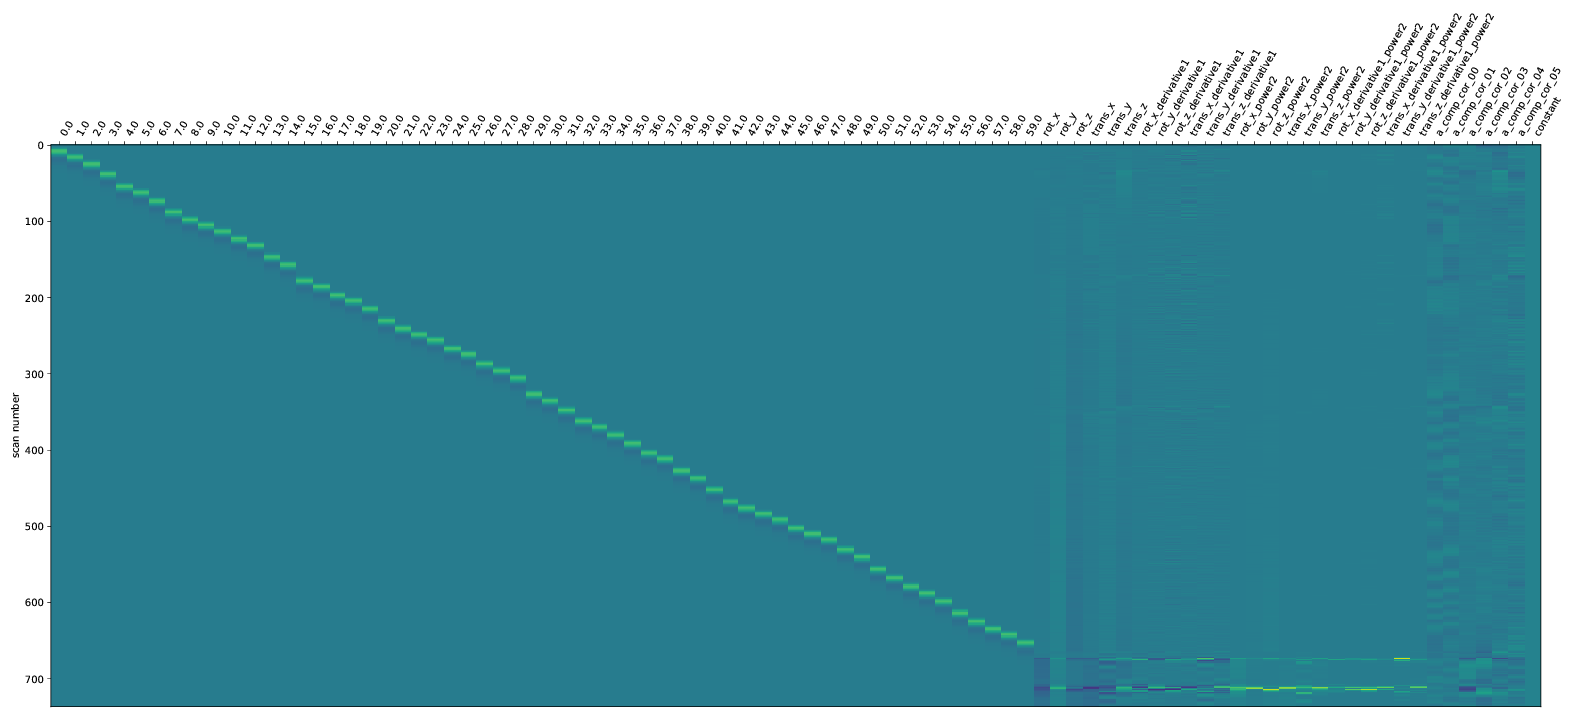

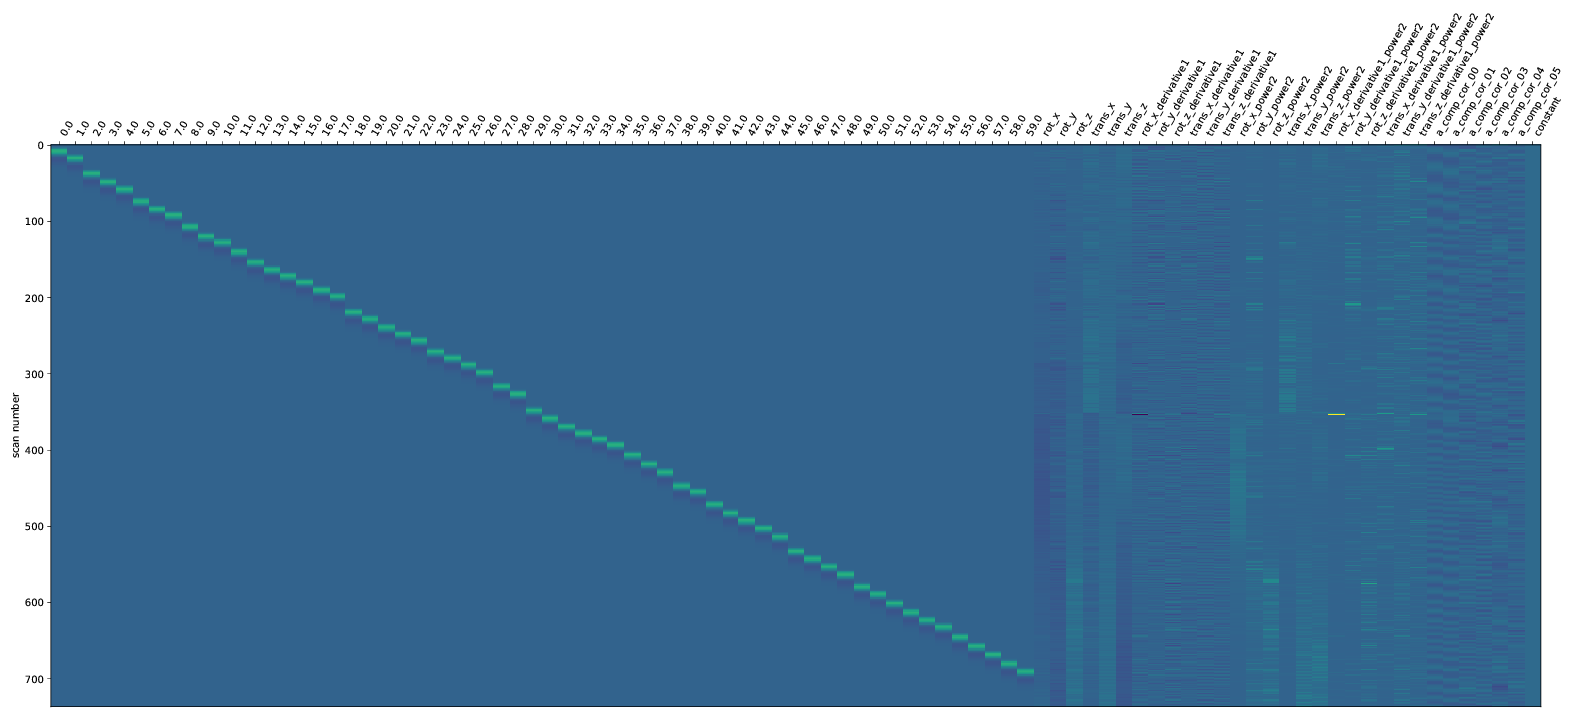

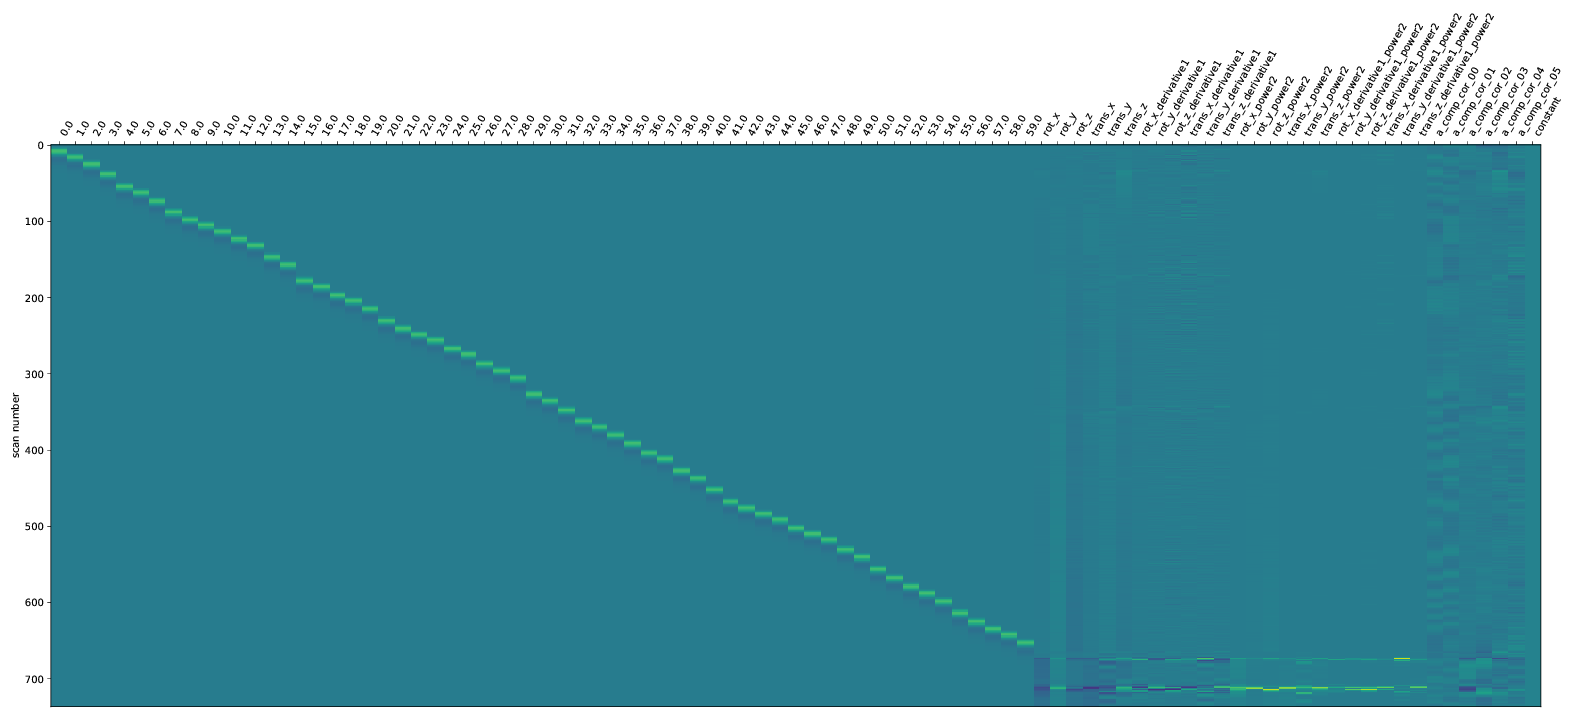

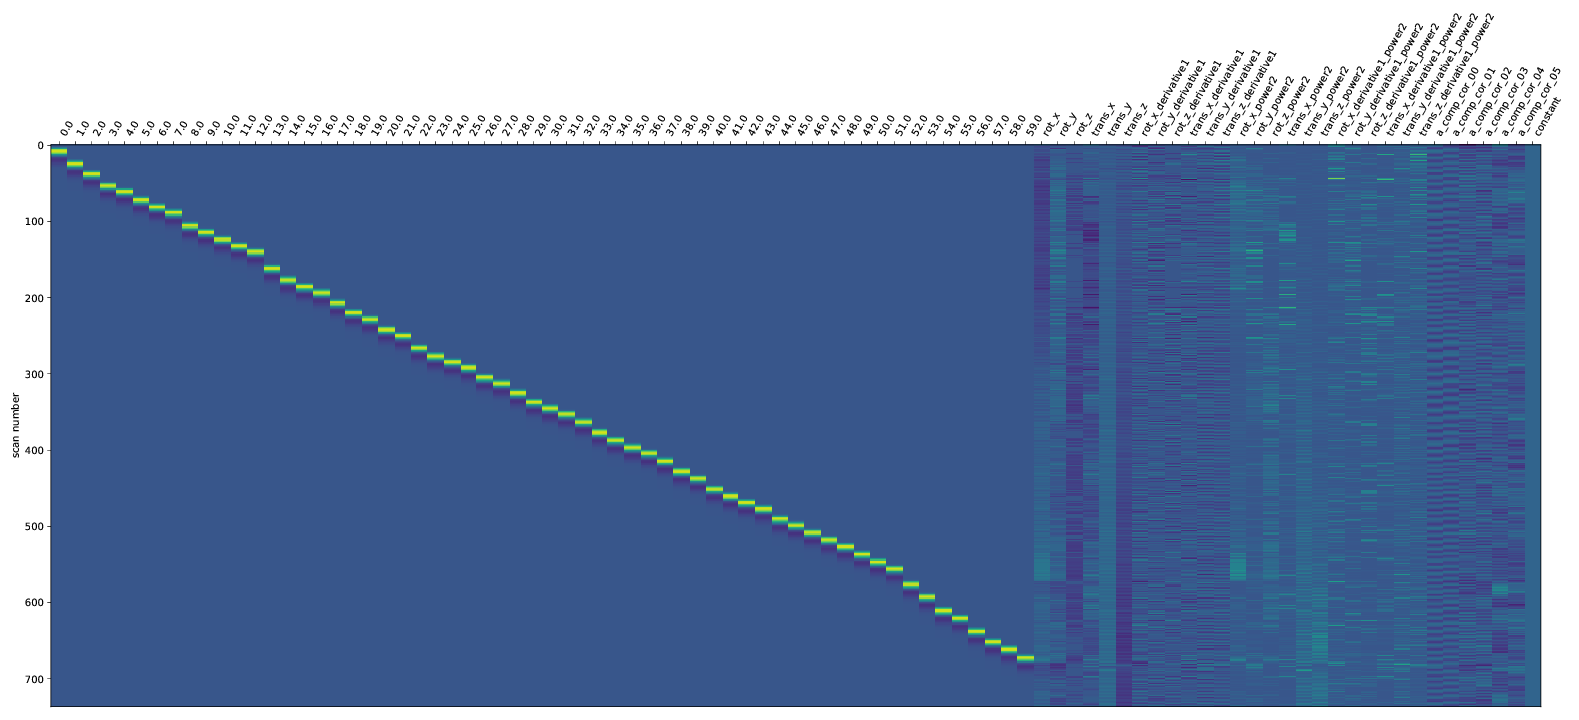

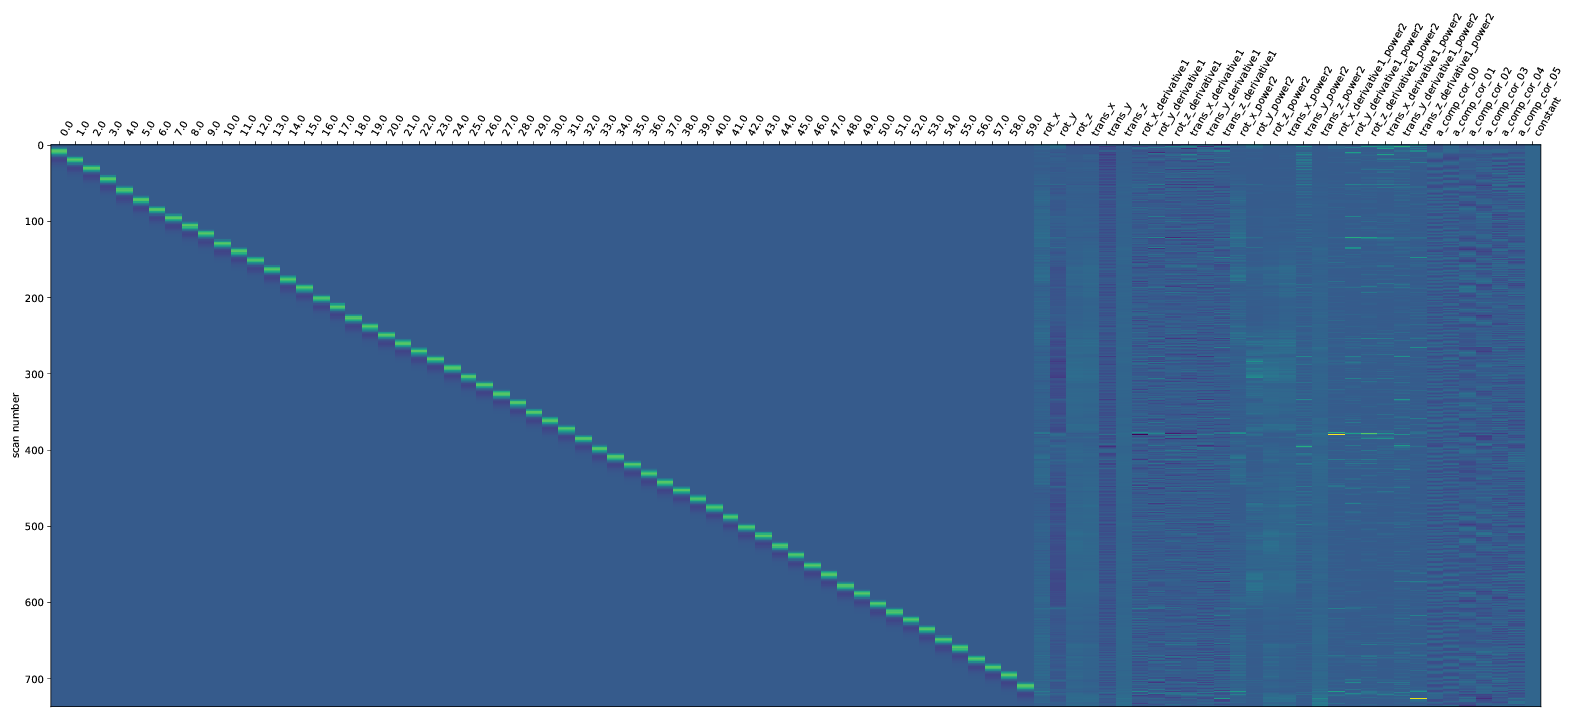

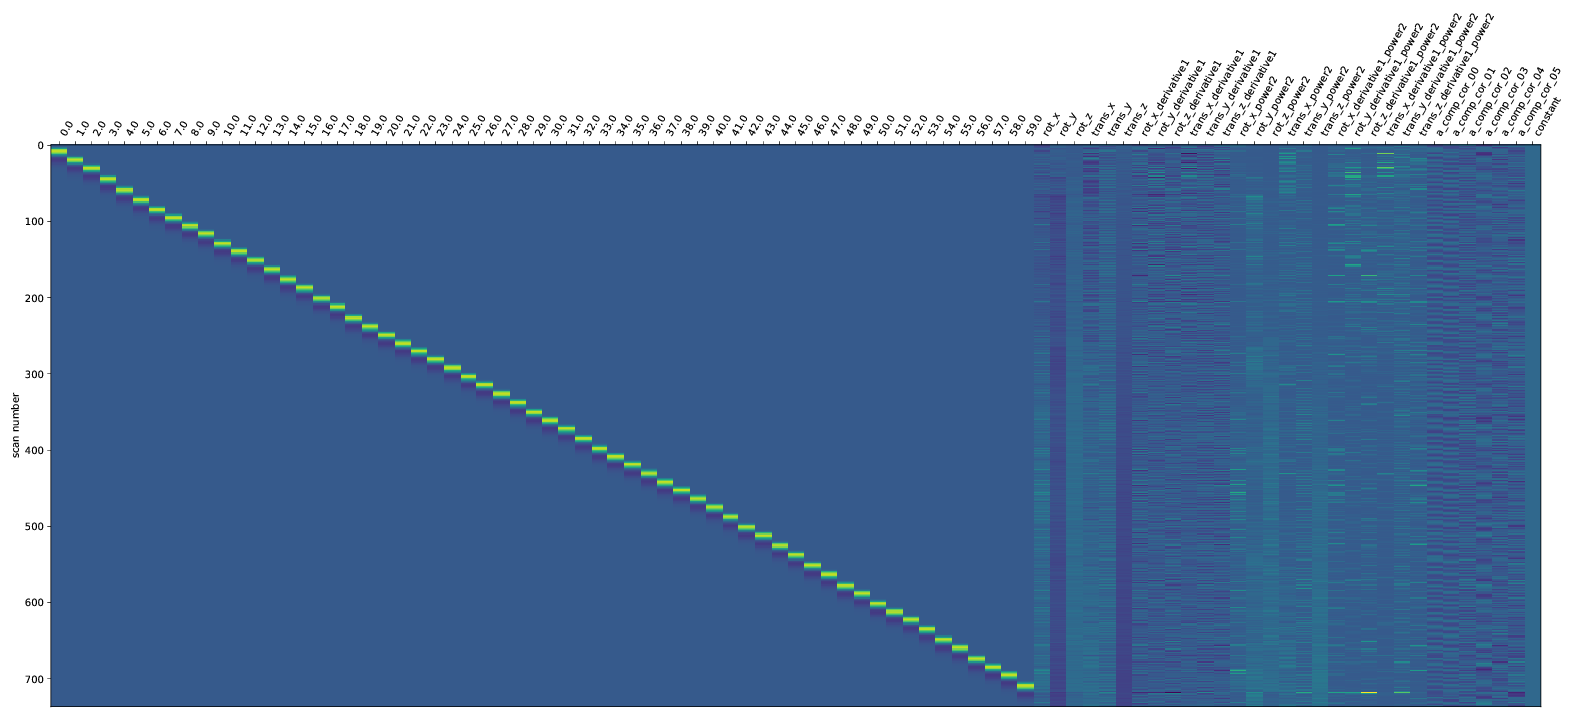

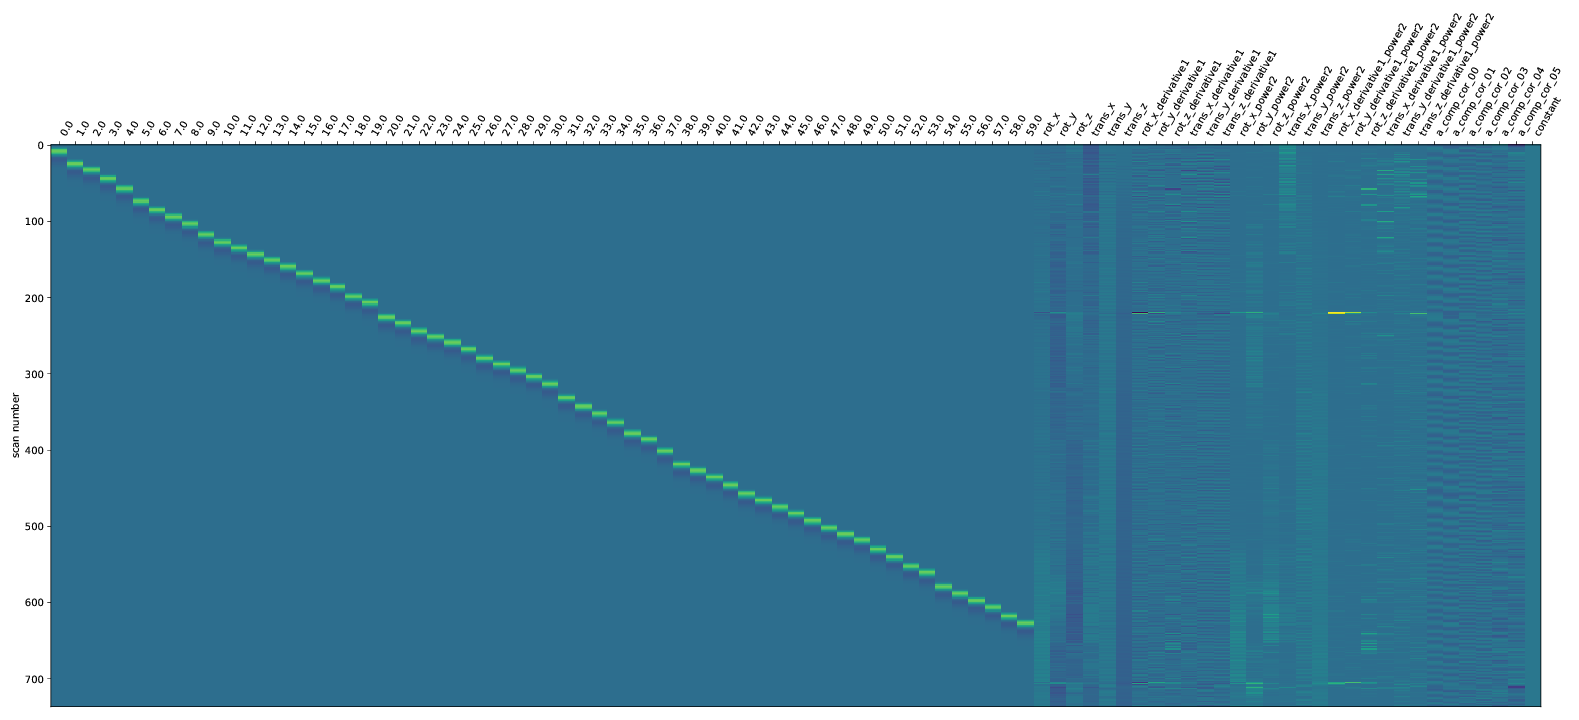

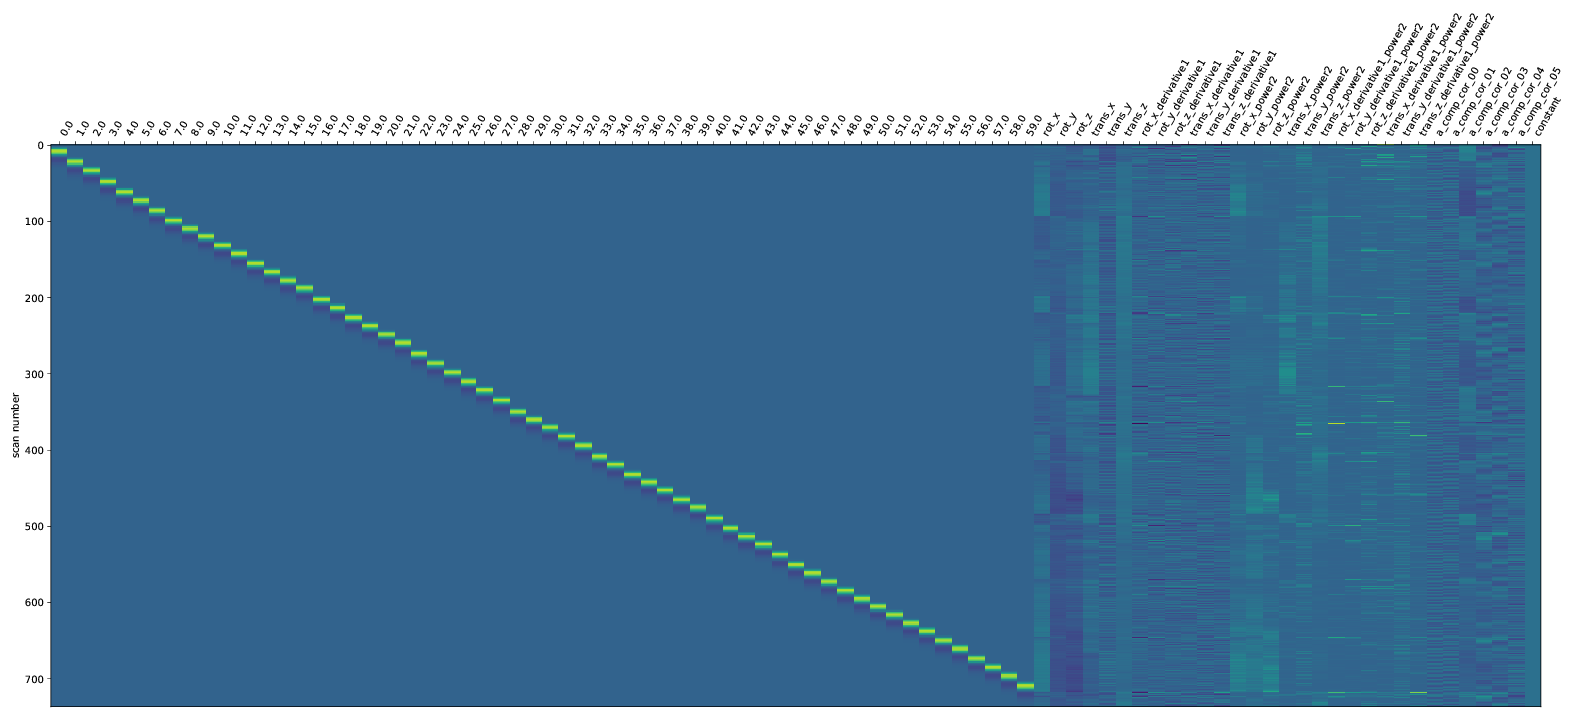

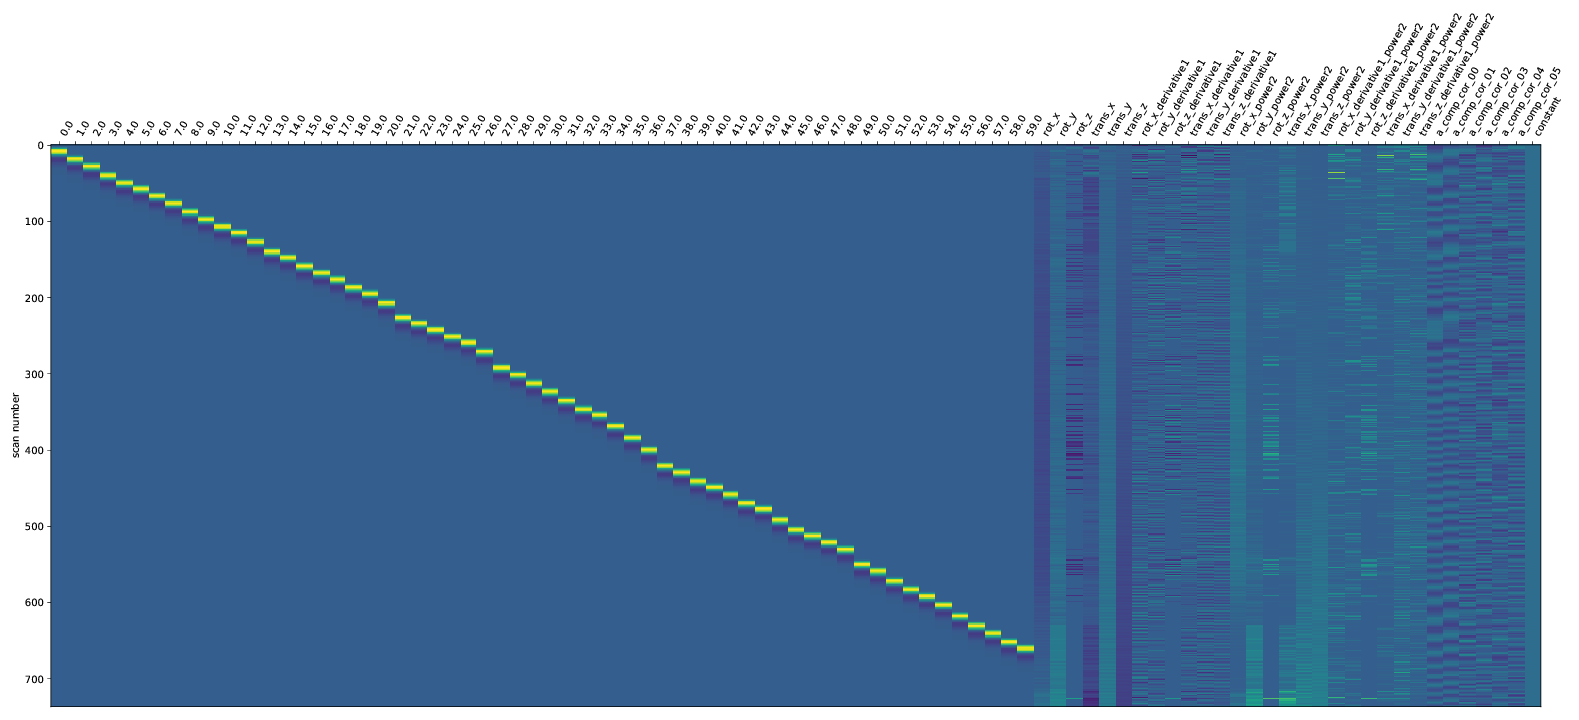

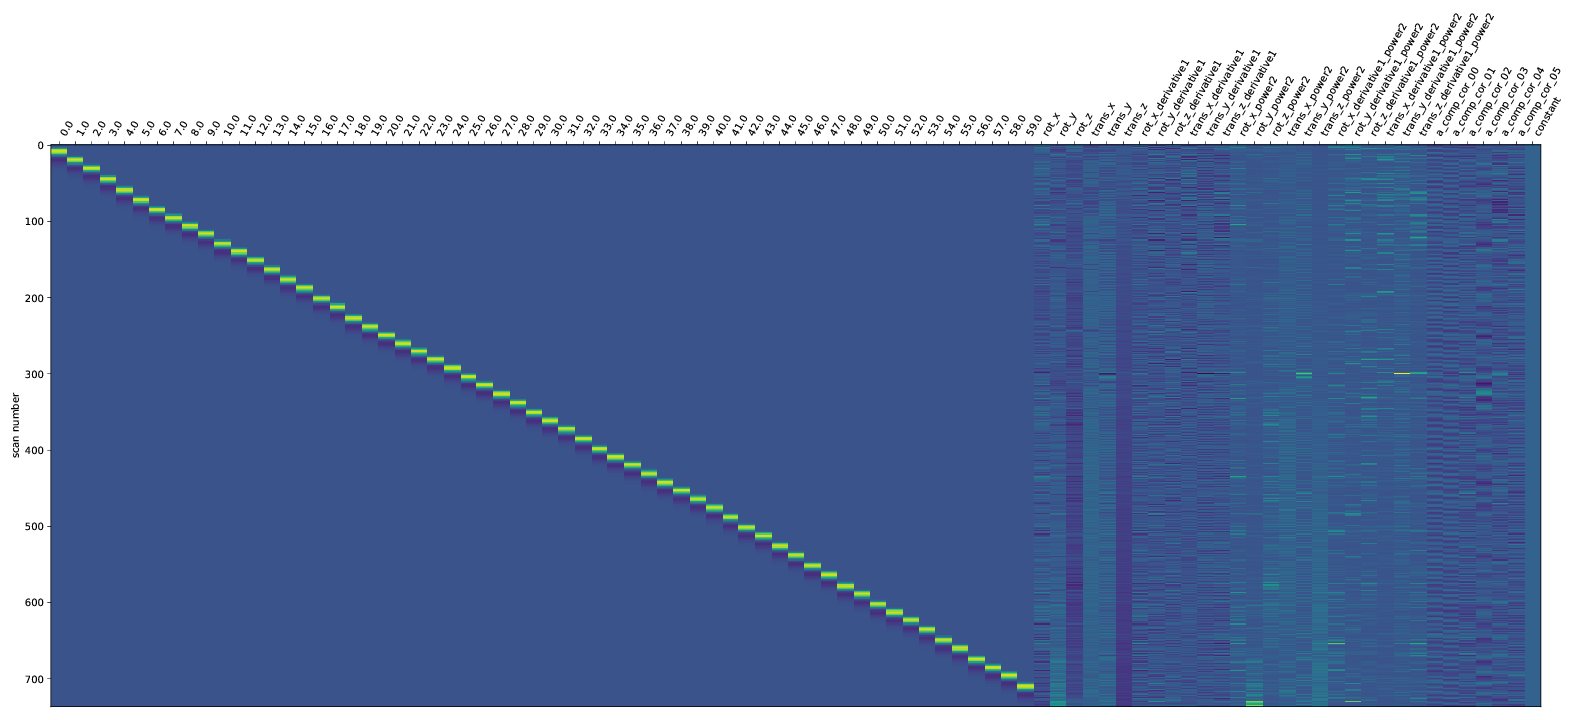

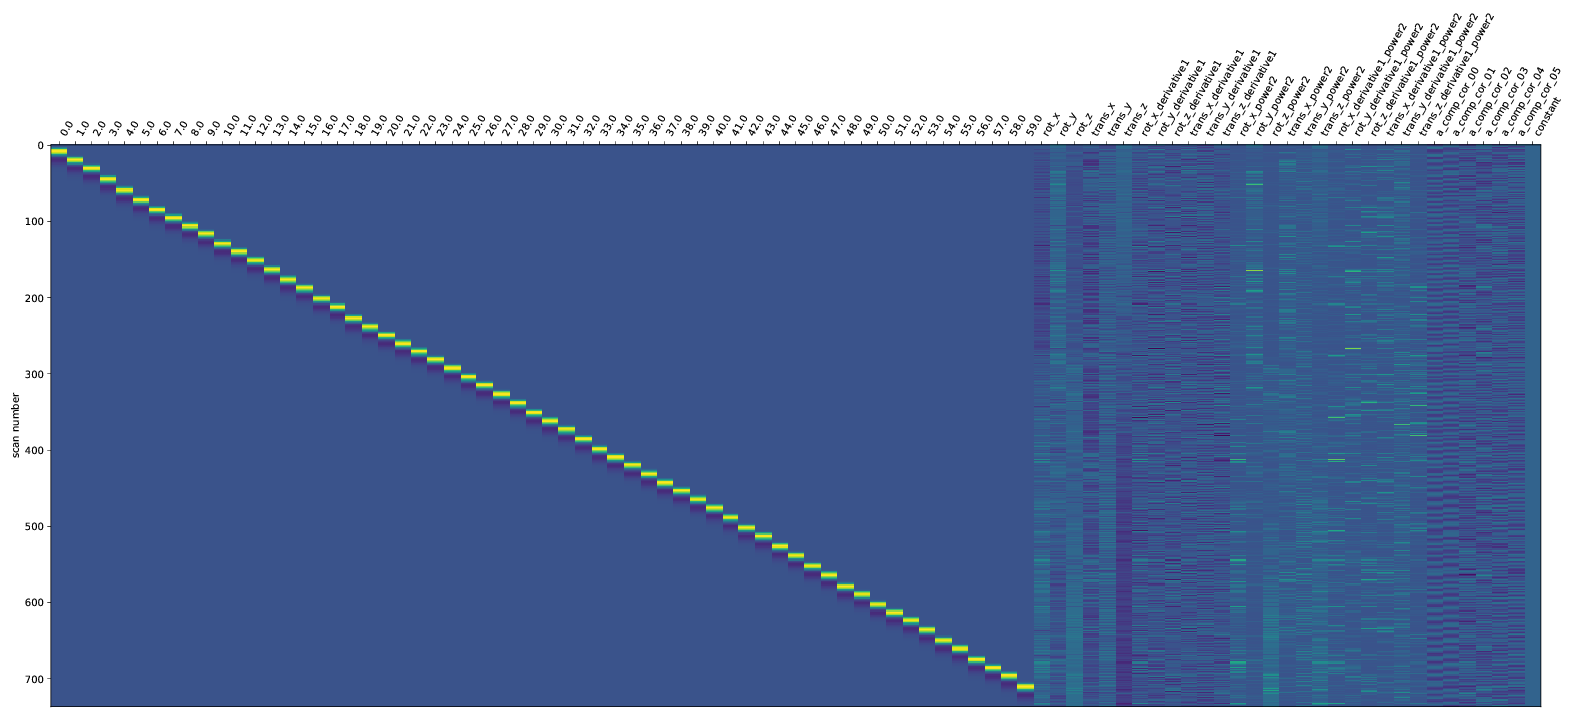

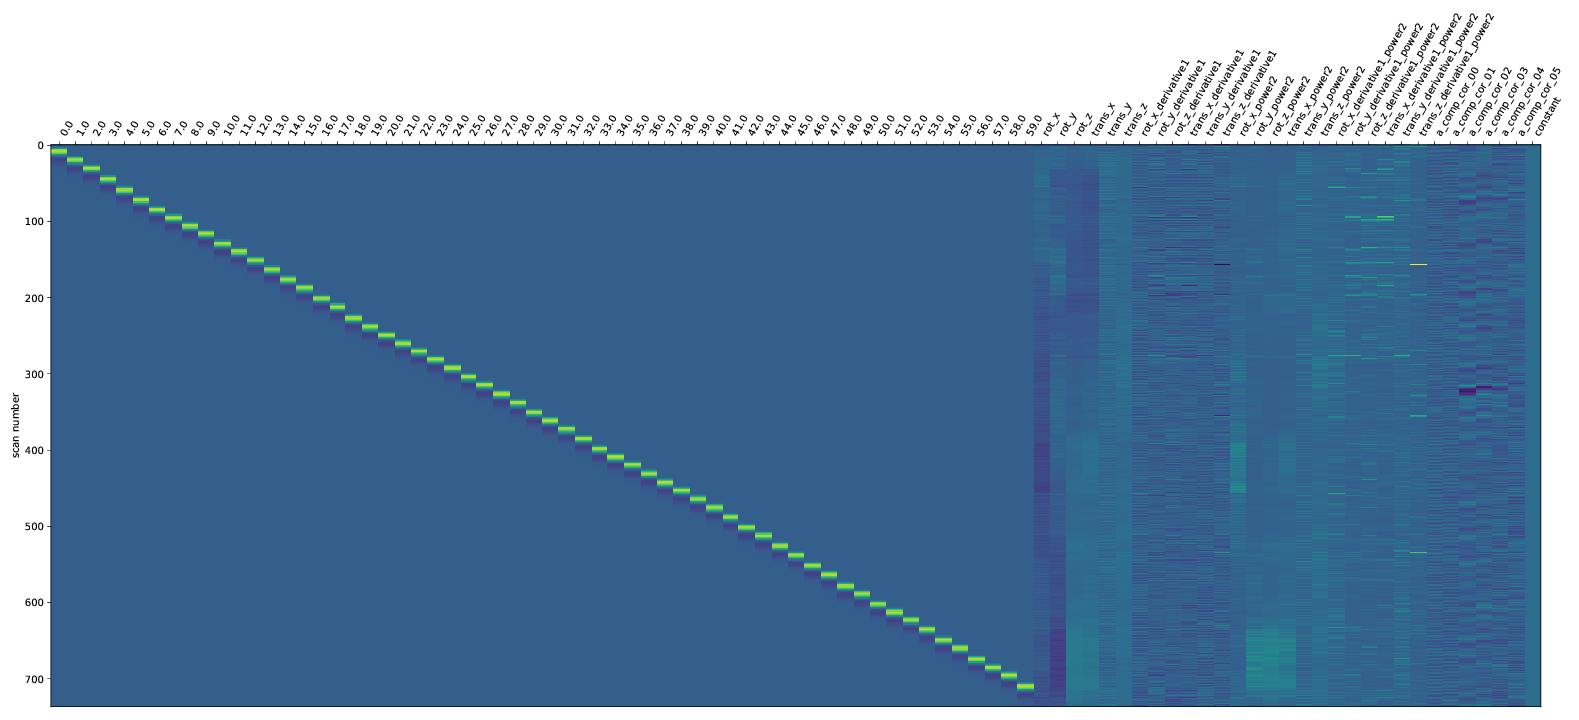

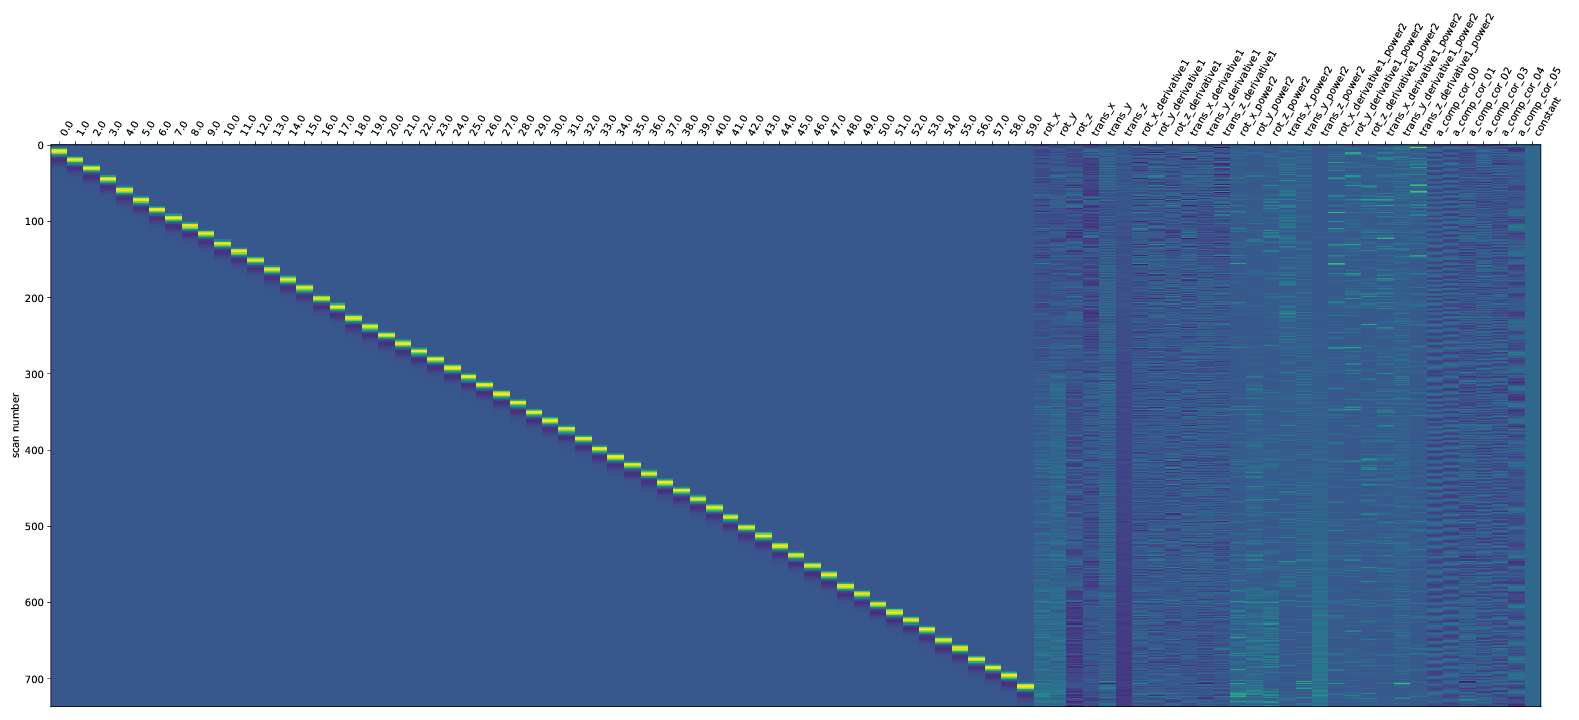

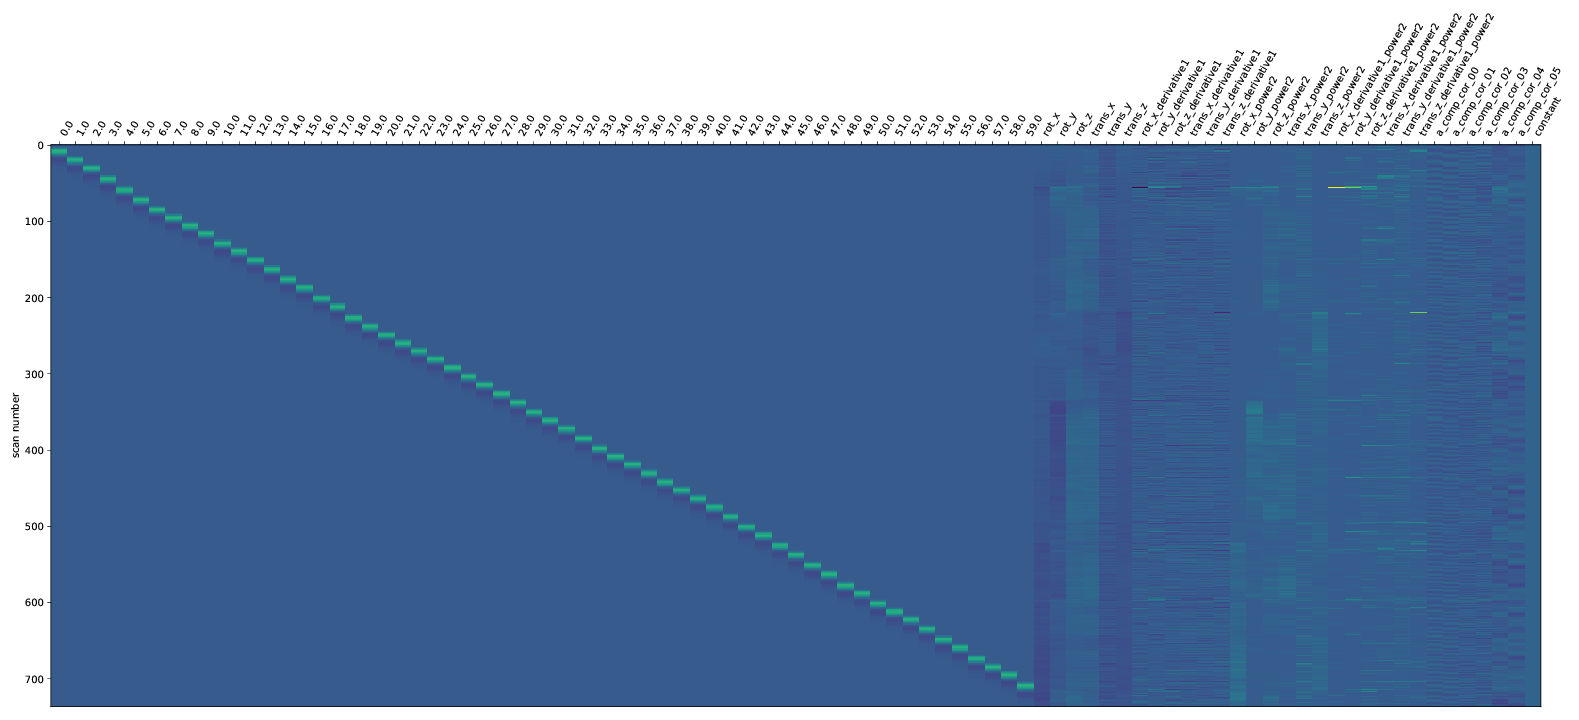

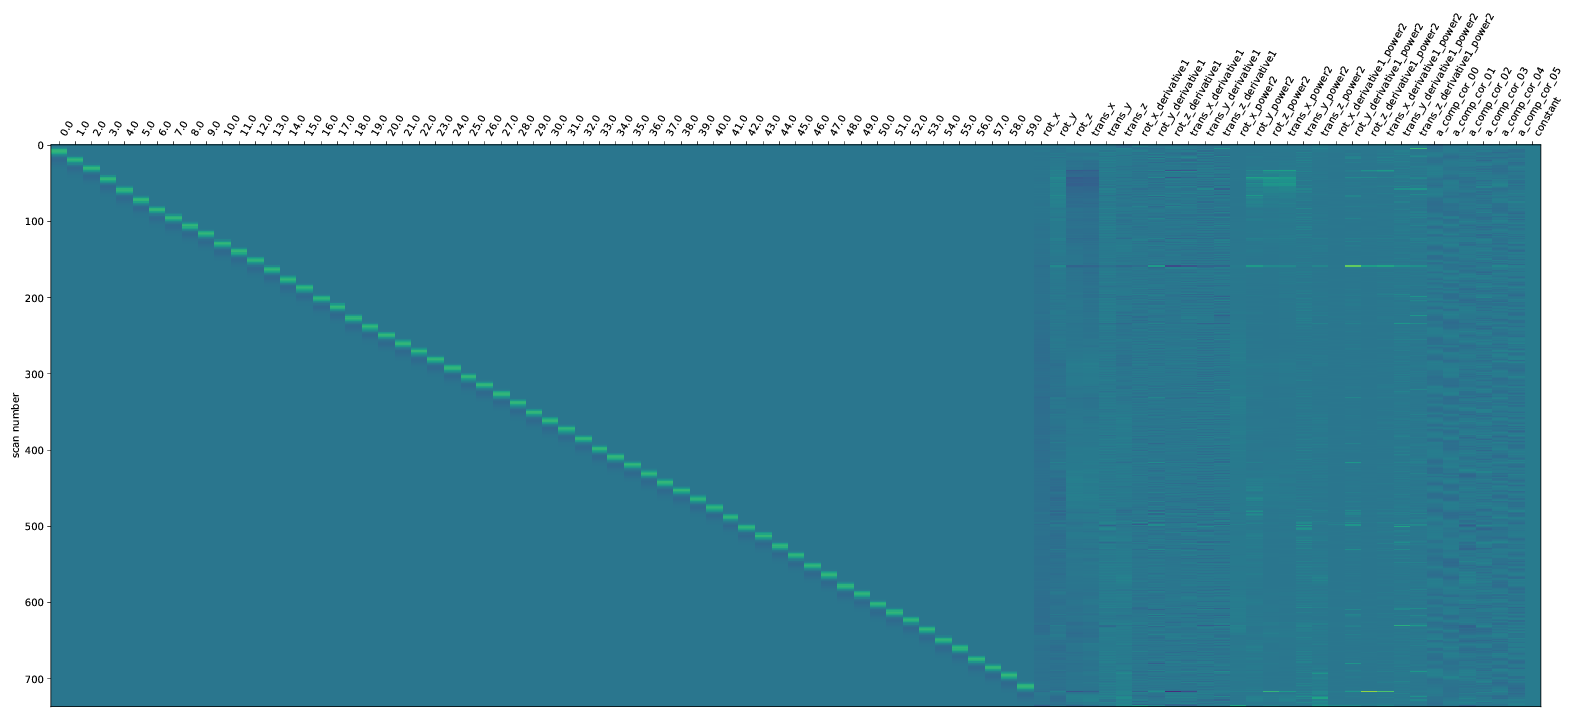

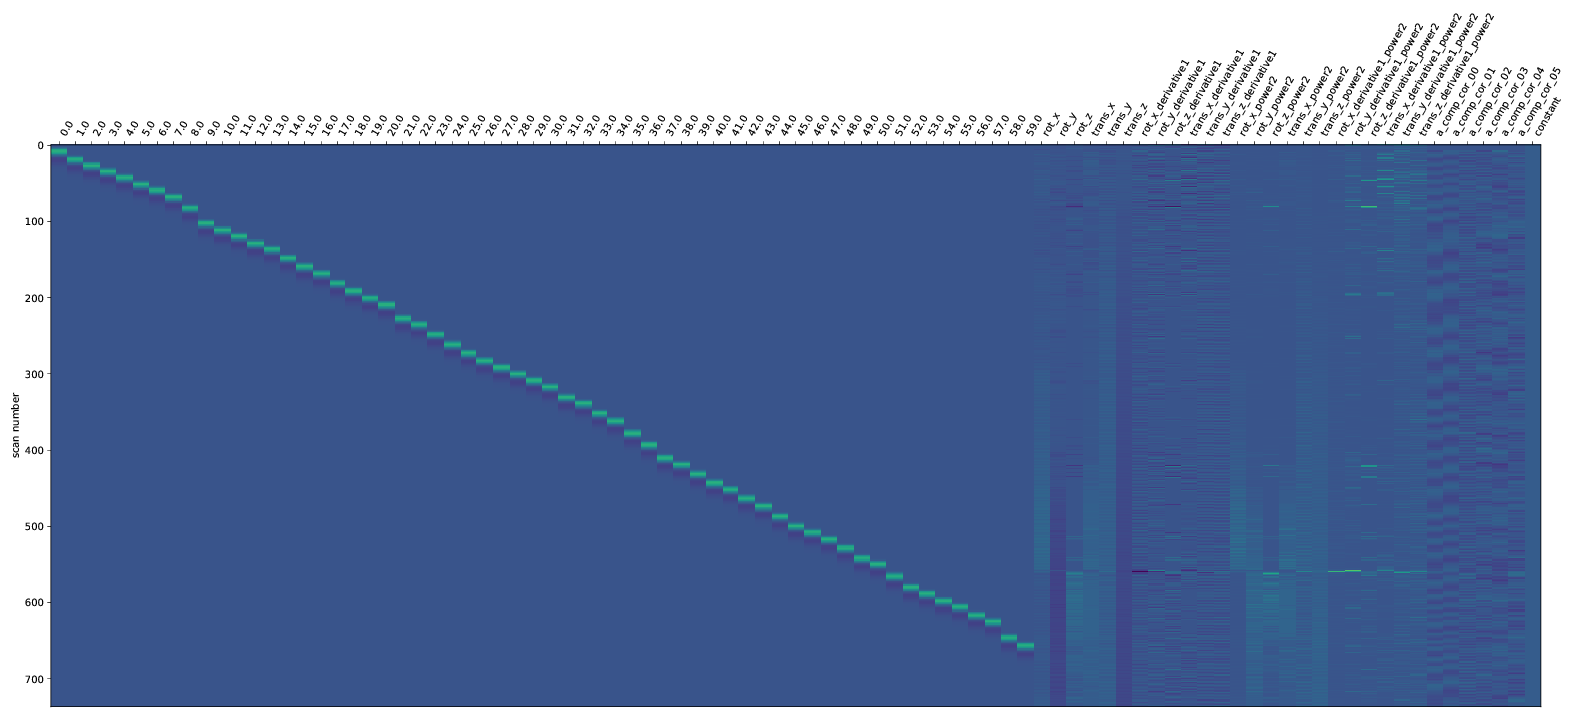

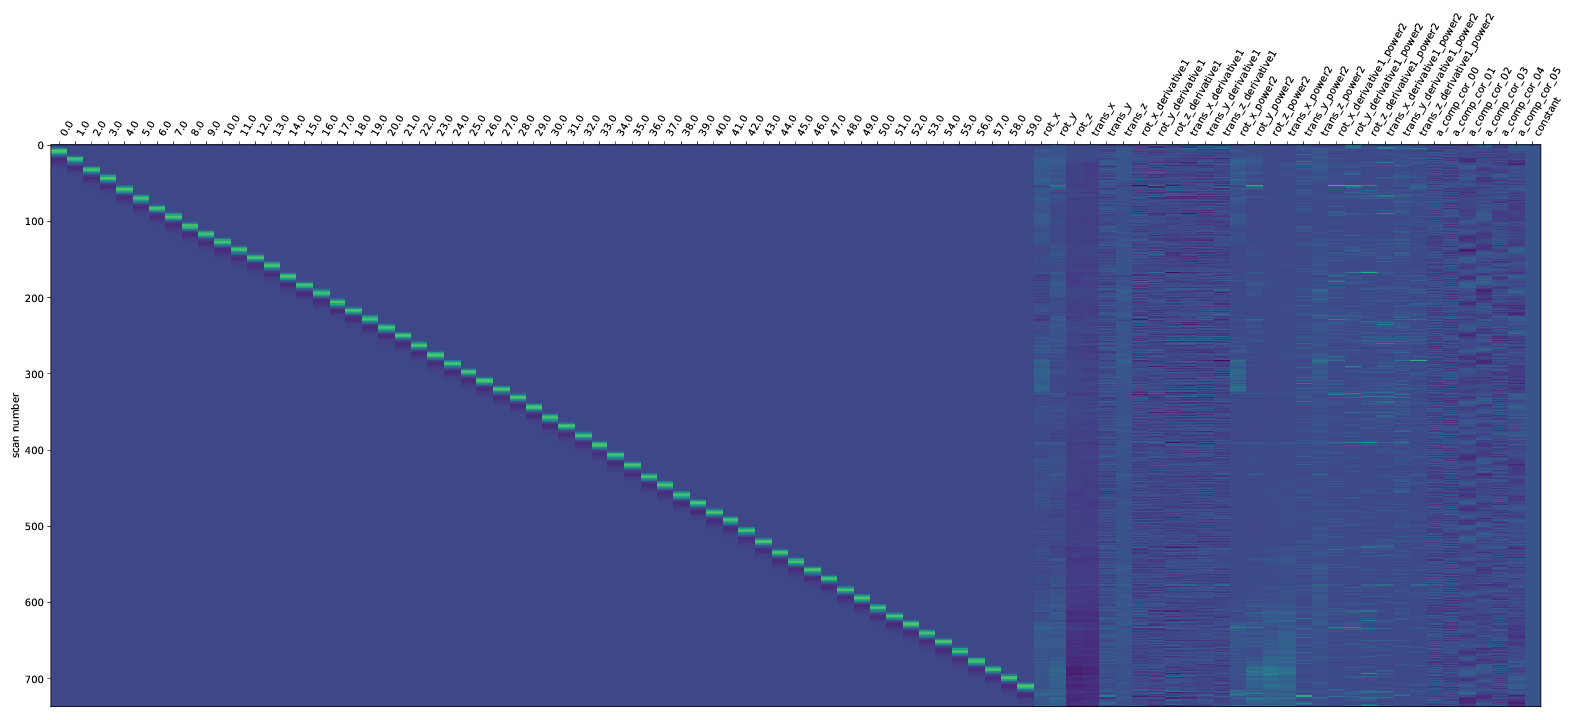

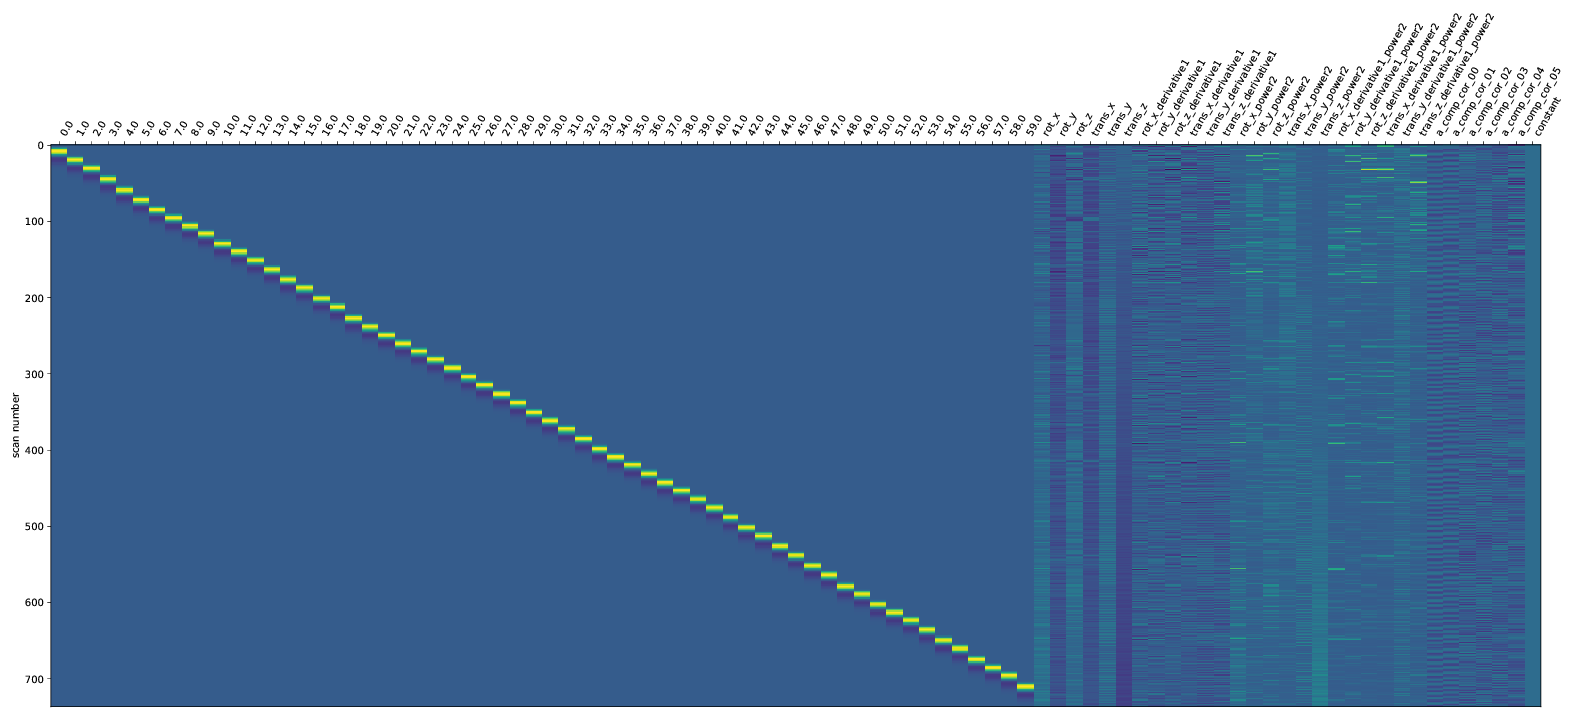

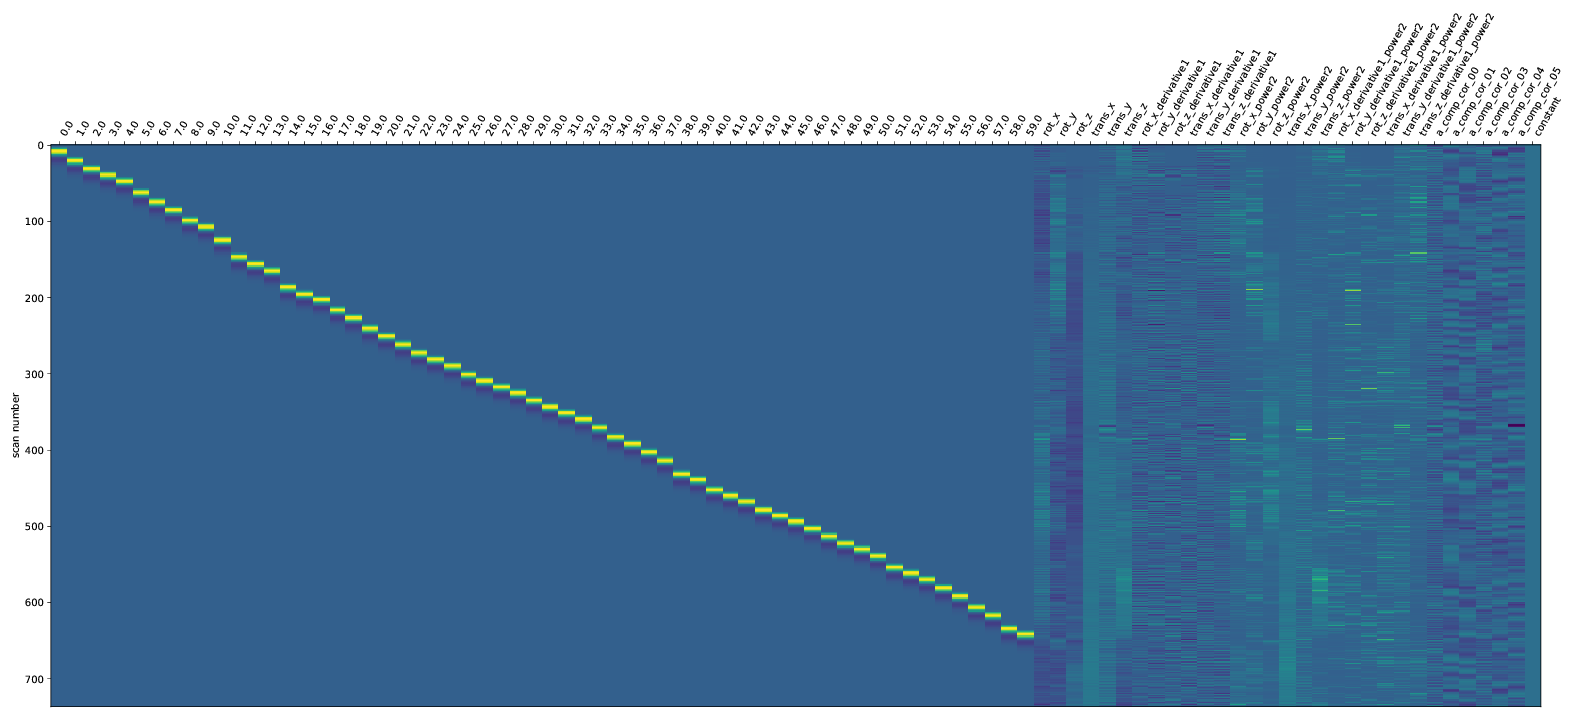

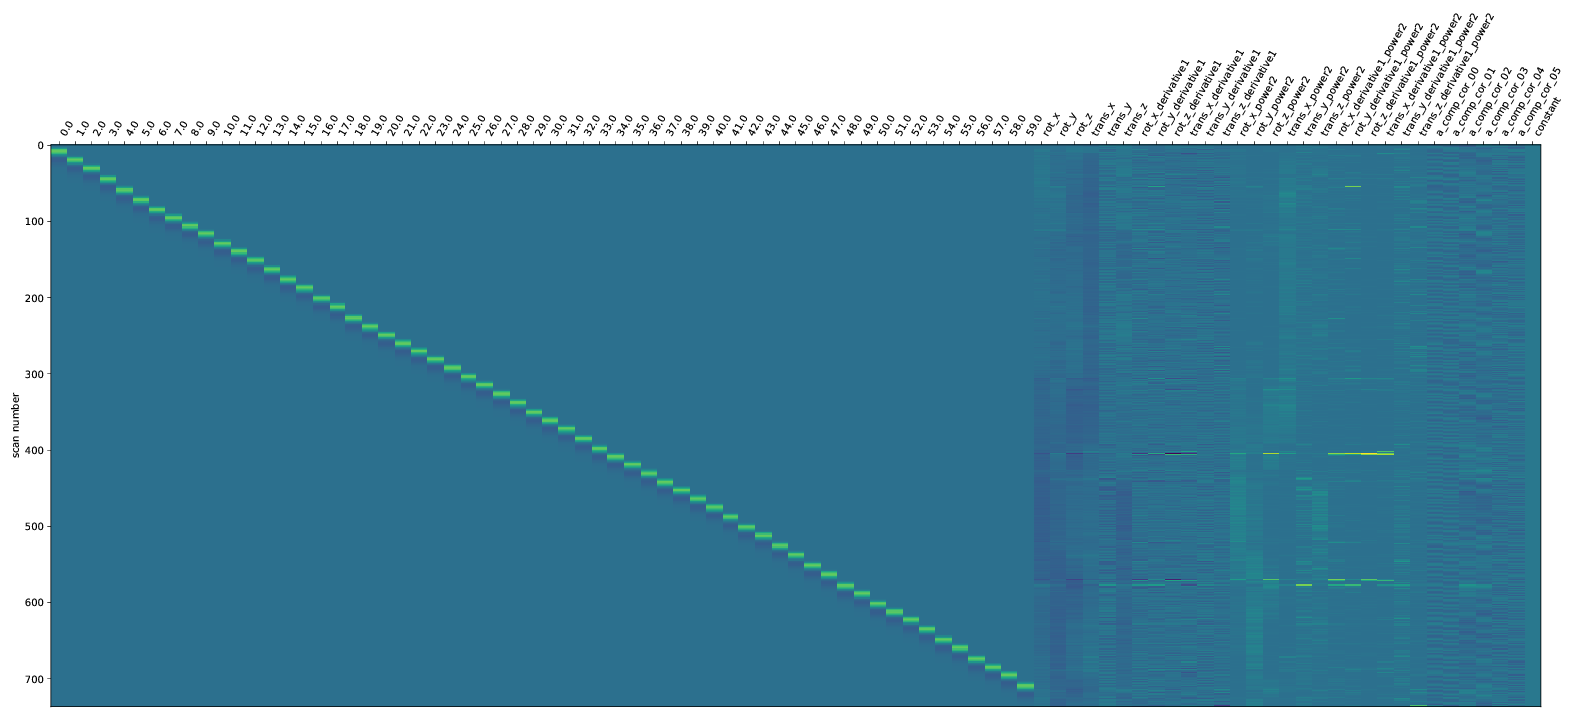

In [10]:
_ = [display(img) for img in imgs]

# Show an axial view of the statistical maps 

In [5]:
from nilearn.image import mean_img, load_img
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
import os, glob
from nilearn.glm import threshold_stats_img

In [6]:
stat_type = 'z_maps'

stat_path = os.path.join(file_dir, stat_type, file_pattern)
print(stat_path)

sub = 790
sess = 2
run = 0

sess = str(sess)
run = str(run).zfill(2)

if len(sess) == 1:
    sess = str(sess).zfill(2)

/lab_data/coaxlab/Projects/loki_1/stat_maps/derivatives/trialwise_response/sub-{}/ses-{}/func/z_maps/*sub-{}*ses-{}*run-{}*.nii.gz


In [7]:
sample_data_pattern = stat_path.format(sub, sess, sub, sess, run)
sample_data_files = glob.glob(sample_data_pattern)

sorted_files = sorted(sample_data_files, key=lambda x:int(x.split('trial-')[1].split('.nii.gz')[0]))

_ = [print(os.path.basename(f)) for f in sorted_files]

trialwise_z_map_sub-790_ses-02_run-00_trial-0.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-1.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-2.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-3.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-4.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-5.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-6.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-7.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-8.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-9.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-10.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-11.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-12.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-13.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-14.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-15.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-16.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_trial-17.nii.gz
trialwise_z_map_sub-790_ses-02_run-00_

In [8]:
epi_file = glob.glob('/lab_data/coaxlab/Projects/loki_1/fmriprep_BOLD_data/sub-{}/ses-{}/func/*run-0{}*space-T1w_desc-preproc_bold.nii.gz'.format(sub, sess, int(run)+1))
print(epi_file)

['/lab_data/coaxlab/Projects/loki_1/fmriprep_BOLD_data/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-T1w_desc-preproc_bold.nii.gz']


In [9]:
stat_imgs = [load_img(f) for f in sorted_files]
epi_imgs = [load_img(f) for f in epi_file]

In [10]:
mean_epi_img = mean_img(epi_imgs[0])

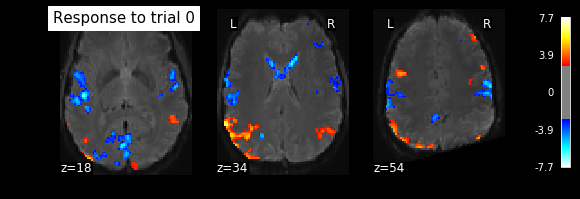

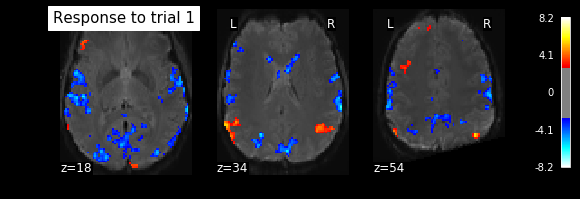

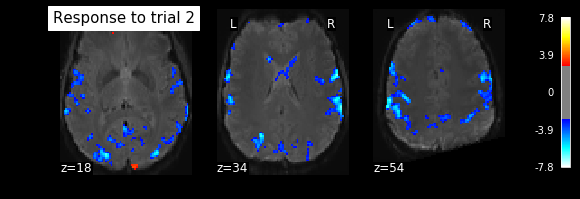

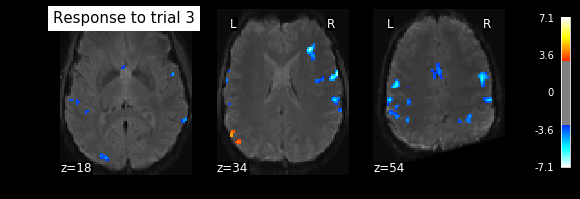

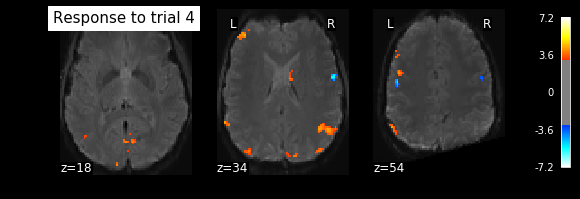

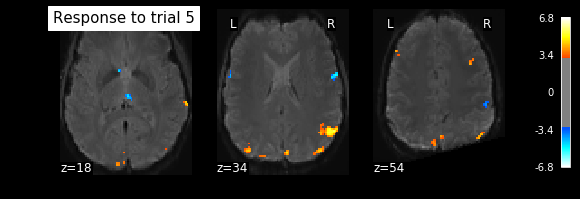

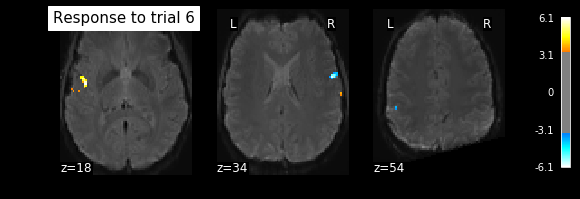

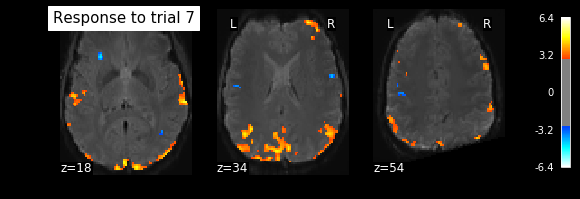

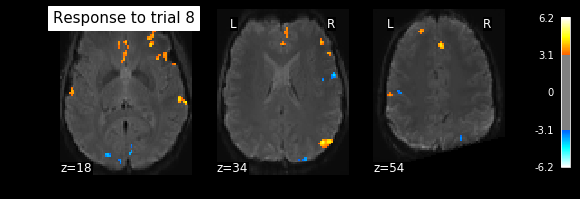

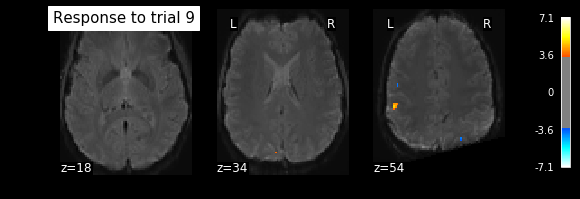

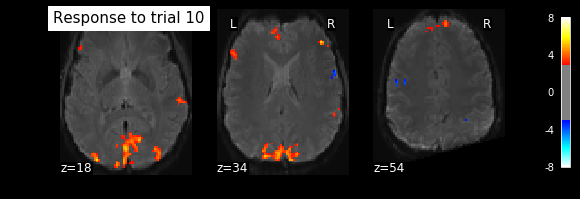

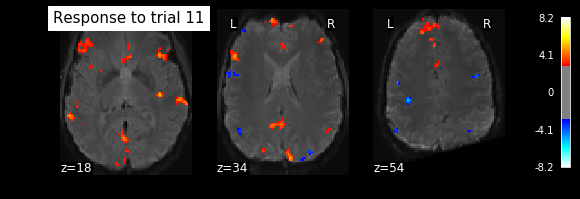

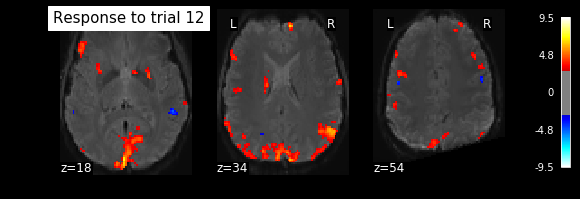

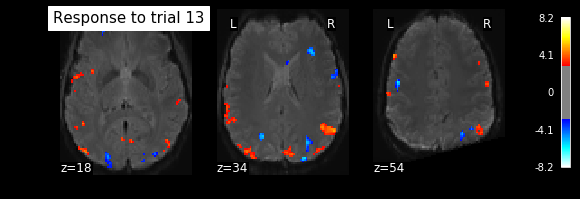

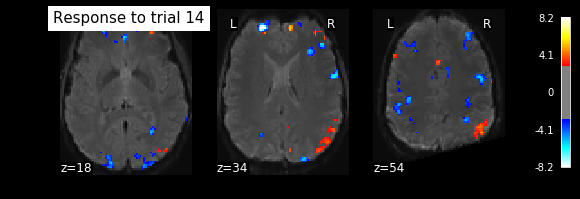

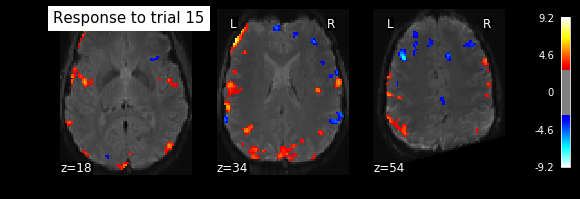

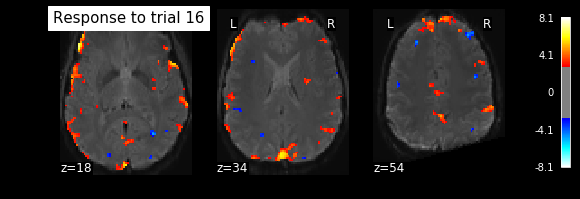

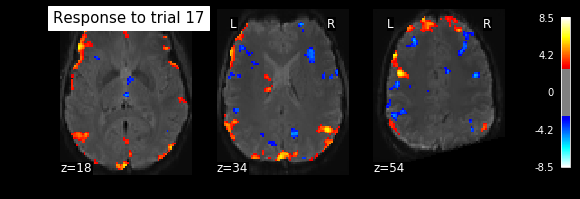

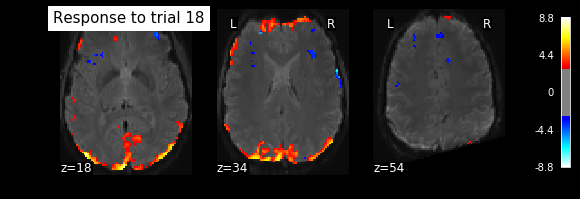

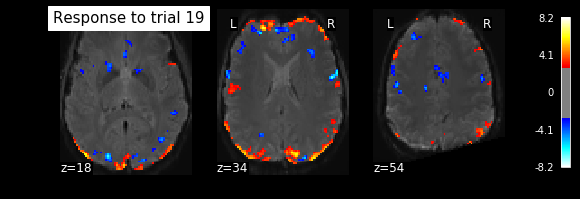

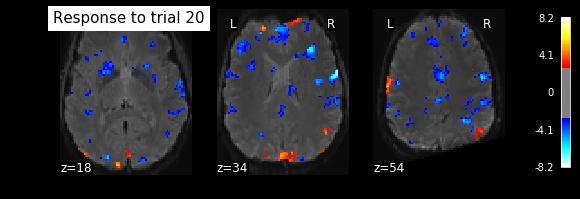

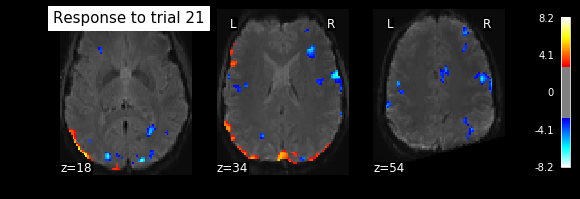

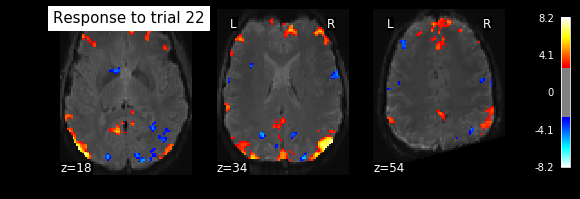

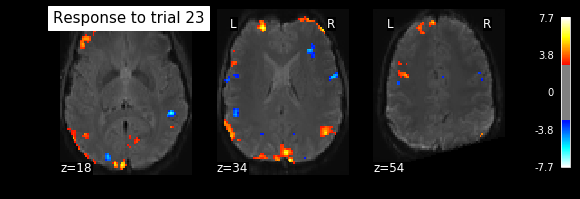

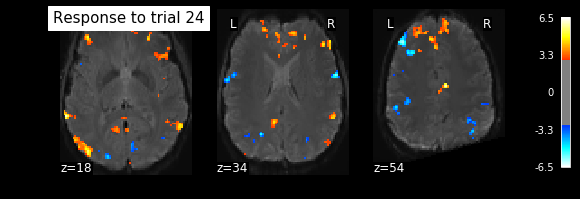

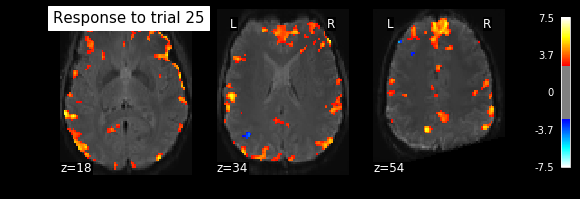

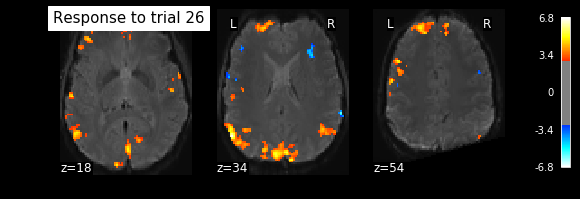

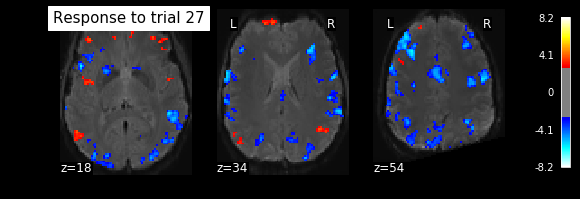

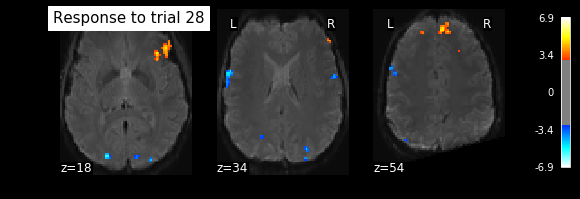

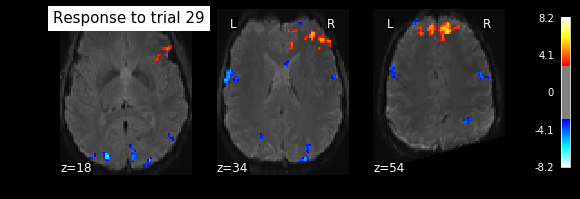

In [15]:
alpha = 0.05
cut_coords = (18,34,54)

for t in range(n_trials_per_run//2):

    title = 'Response to trial {}'.format(t)
    
    clean_map, threshold = threshold_stats_img(
    stat_imgs[t], alpha=alpha, height_control='fdr', cluster_threshold=30)

    plot_stat_map(clean_map, bg_img=mean_epi_img, threshold=threshold,
              display_mode='z', cut_coords=cut_coords, black_bg=True,
              title=title)

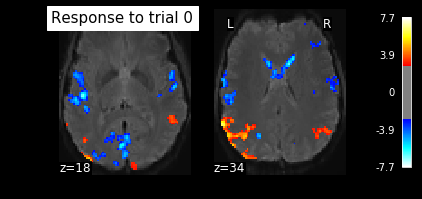

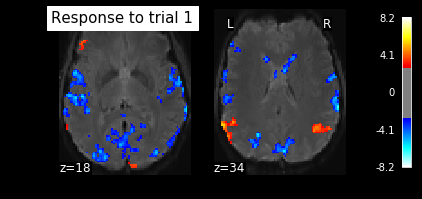

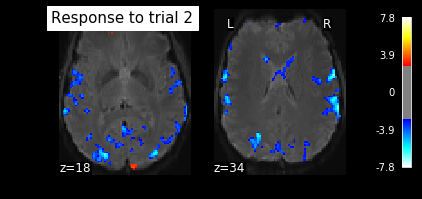

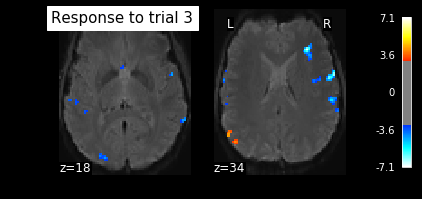

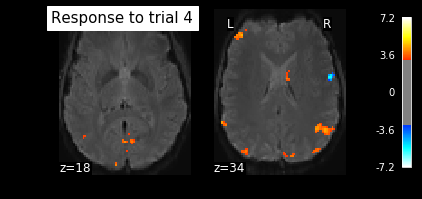

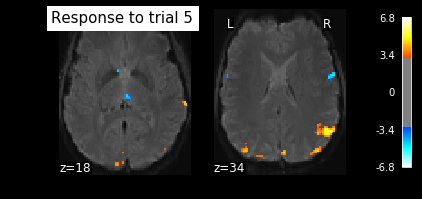

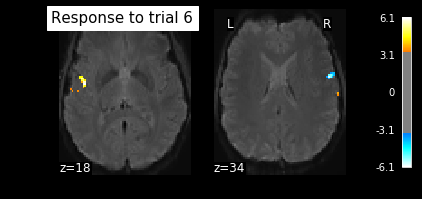

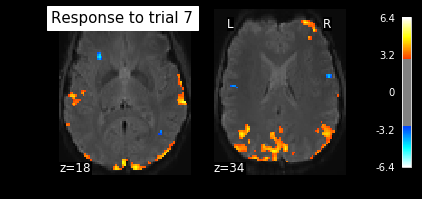

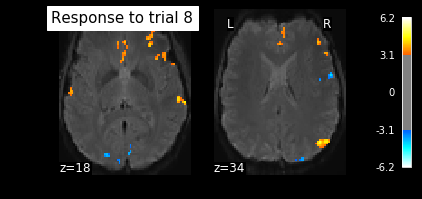

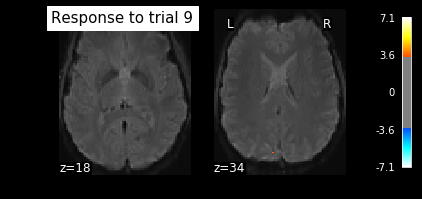

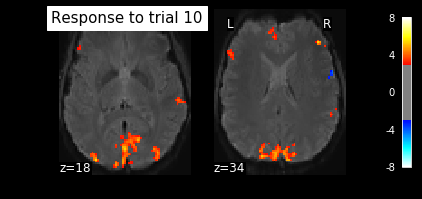

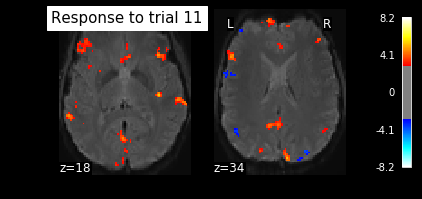

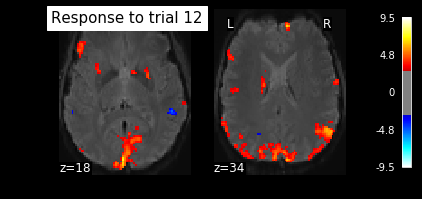

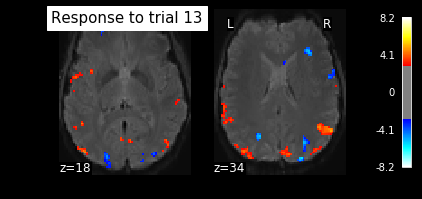

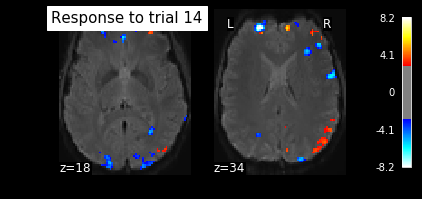

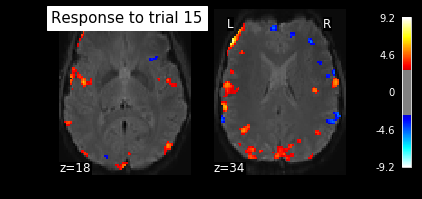

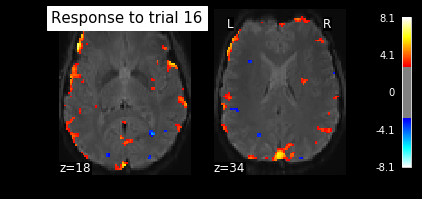

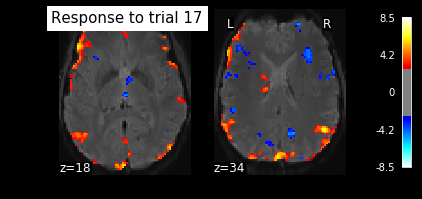

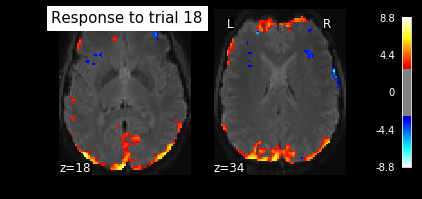

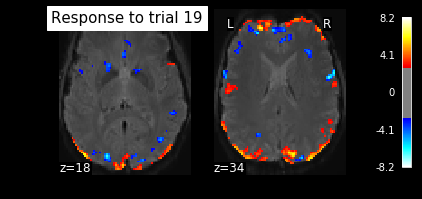

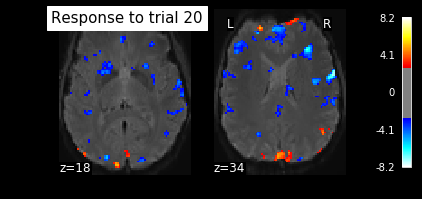

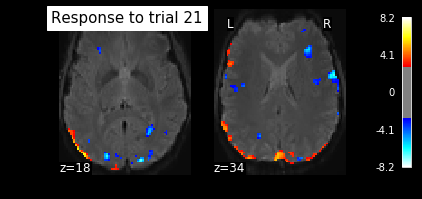

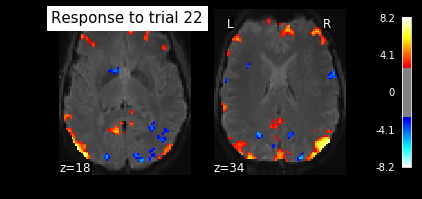

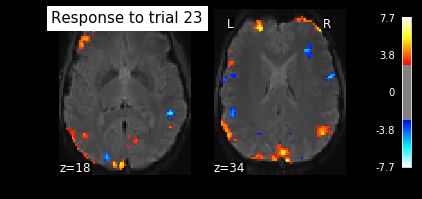

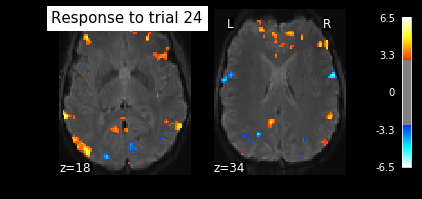

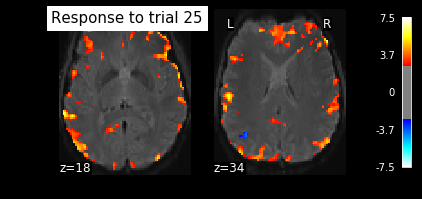

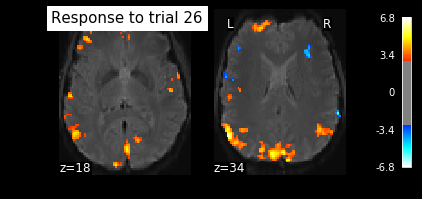

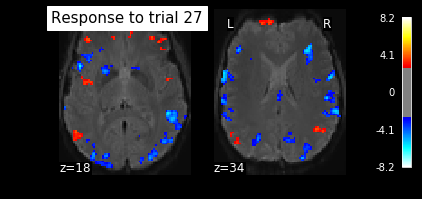

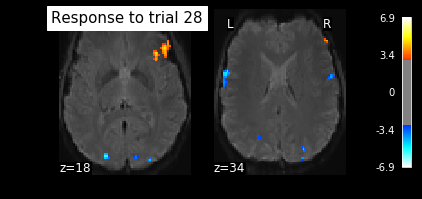

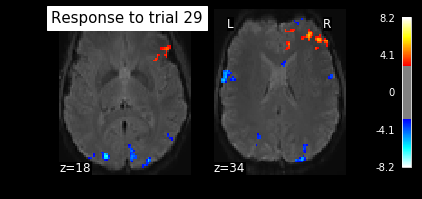

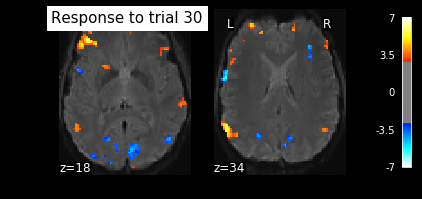

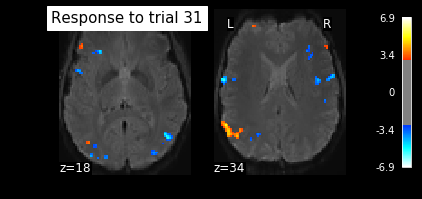

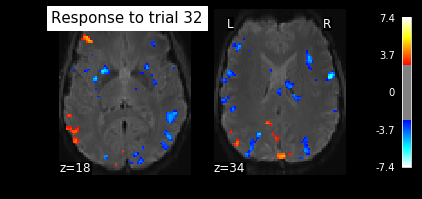

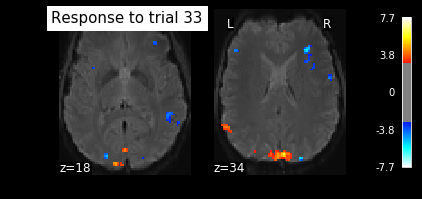

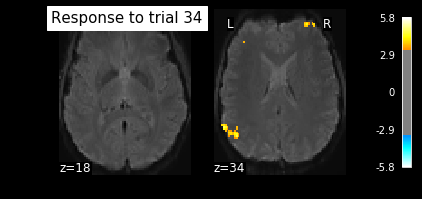

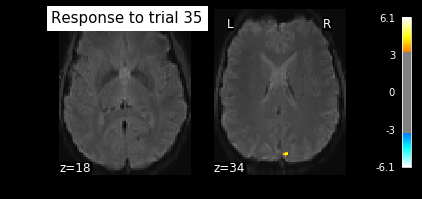

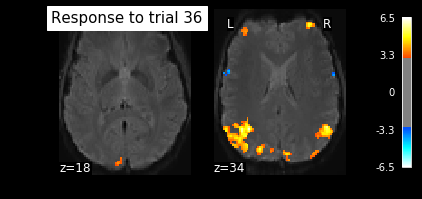

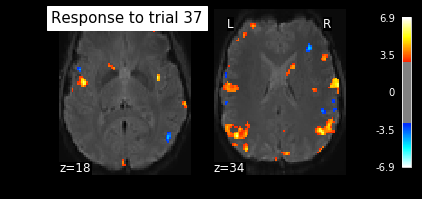

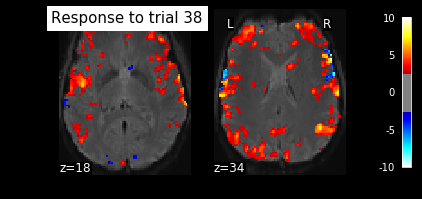

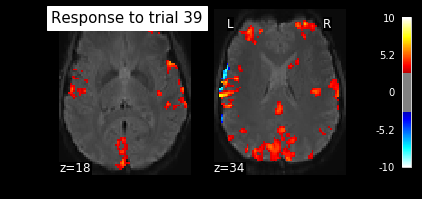

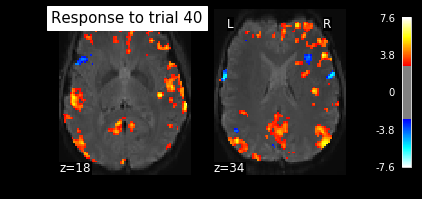

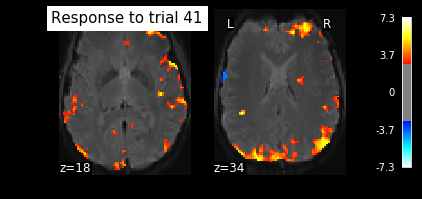

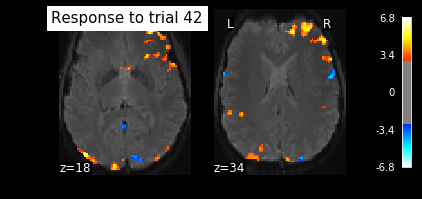

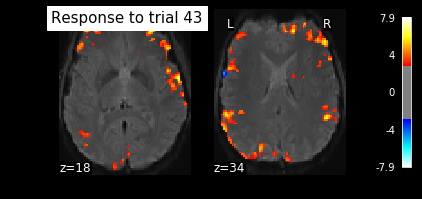

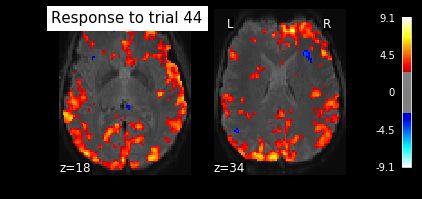

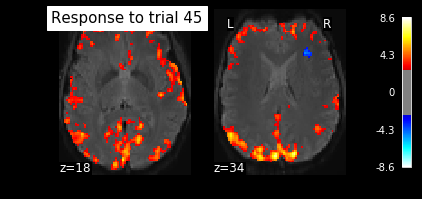

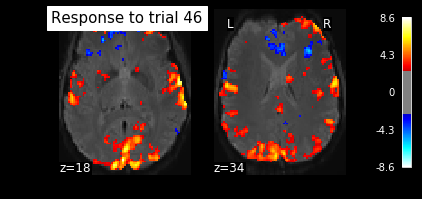

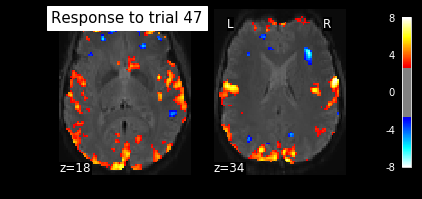

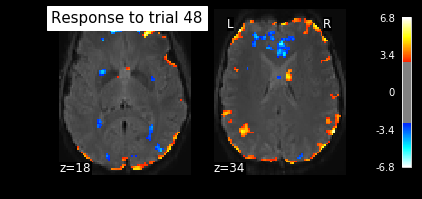

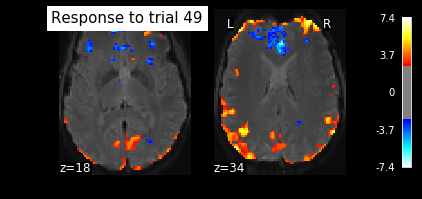

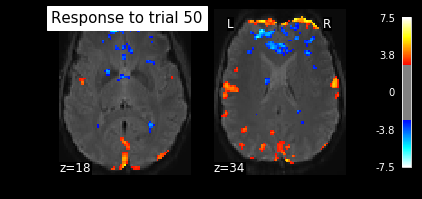

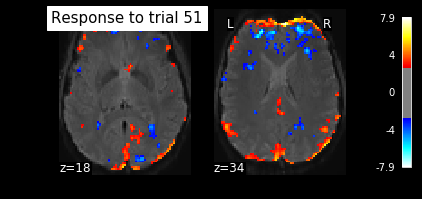

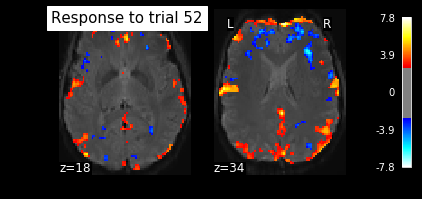

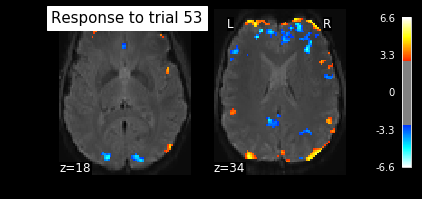

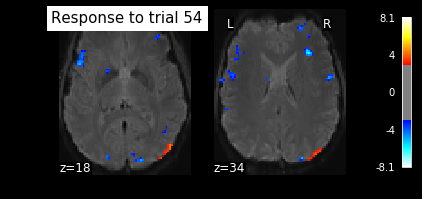

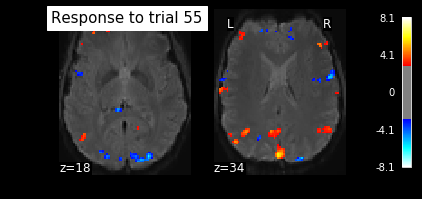

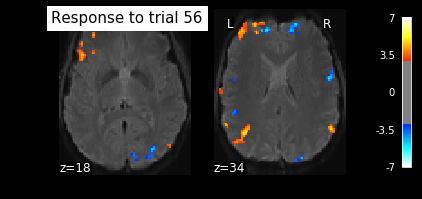

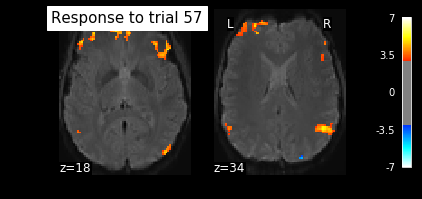

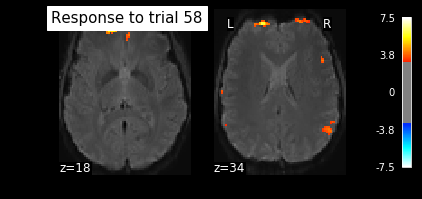

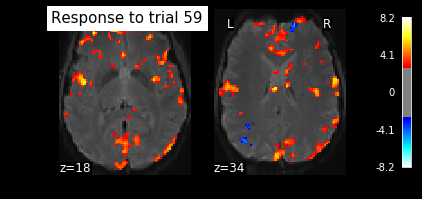

In [16]:
cut_coords = (18,34)

for t in range(n_trials_per_run):

    title = 'Response to trial {}'.format(t)
    
    clean_map, threshold = threshold_stats_img(
    stat_imgs[t], alpha=alpha, height_control='fdr', cluster_threshold=30)

    plot_stat_map(clean_map, bg_img=mean_epi_img, threshold=threshold,
              display_mode='z', cut_coords=cut_coords, black_bg=True,
              title=title)